# Classifying Fetal Health

Anggota Kelompok:

Reyner Wongso - 2501959586 - Data Science - Binus University - reyner.wongso@binus.ac.id

Ravael Daffa R.H - 2540134602 - Data Science - Binus University - ravael.hardjodipuro@binus.ac.id

Sebastian Hariman - 2540134092 - Data Science - Binus University - sebastian.hariman@binus.ac.id

Matthew Aaron Sugiyarto - 2501983742 - Data Science - Binus University - matthew.sugiyarto@binus.ac.id

# Importing Library & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("fetal_health.csv")
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


Function diatas digunakan untuk mendapatkan beberapa baris pertama dari dataset.

# Exploratory Data Analysis

In [3]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

Function diatas digunakan untuk melihat kolom yang ada di dataset ini.

Dataset ini memiliki kolom:
1. baseline value
2. accelerations
3. fetal_movement
4. uterine_contractions
5. light_decelerations
6. severe_decelerations
7. prolongued_decelerations
8. abnormal_short_term_variability
9. mean_value_of_short_term_variability
10. percentage_of_time_with_abnormal_long_term_variability
11. mean_value_of_long_term_variability
12. histogram_width
13. histogram_min
14. histogram_max
15. histogram_number_of_peaks
16. histogram_number_of_zeroes
17. histogram_mode
18. histogram_mean
19. histogram_median
20. histogram_variance
21. histogram_tendency
22. fetal_health

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

Function diatas digunakan untuk melihat jumlah observasi dan tipe data dari setiap kolom. Didapat tidak ada value yang missing, dan semua kolom memiliki tipe data float.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


Function diatas digunakan untuk mendapatkan descriptive statistics seperti mean, standard deviation, kuartil, nilai minimum dan nilai maksimum di setiap kolom.

In [6]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

Function diatas digunakan untuk mengetahui jumlah missing values yang ada di setiap kolom. Tidak terdapat missing values di kolom yang ada.

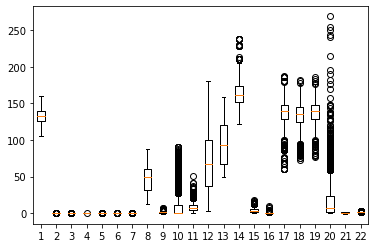

In [7]:
plt.boxplot(df)
plt.show()

Function diatas digunakan untuk melihat jumlah outlier yang ada jika menggunakan metode boxplot. Dikarenakan jumlah outlier beberapa variabel cukup banyak, tidak dilakukan penghapusan outlier karena sisa observasi akan sangat sedikit.

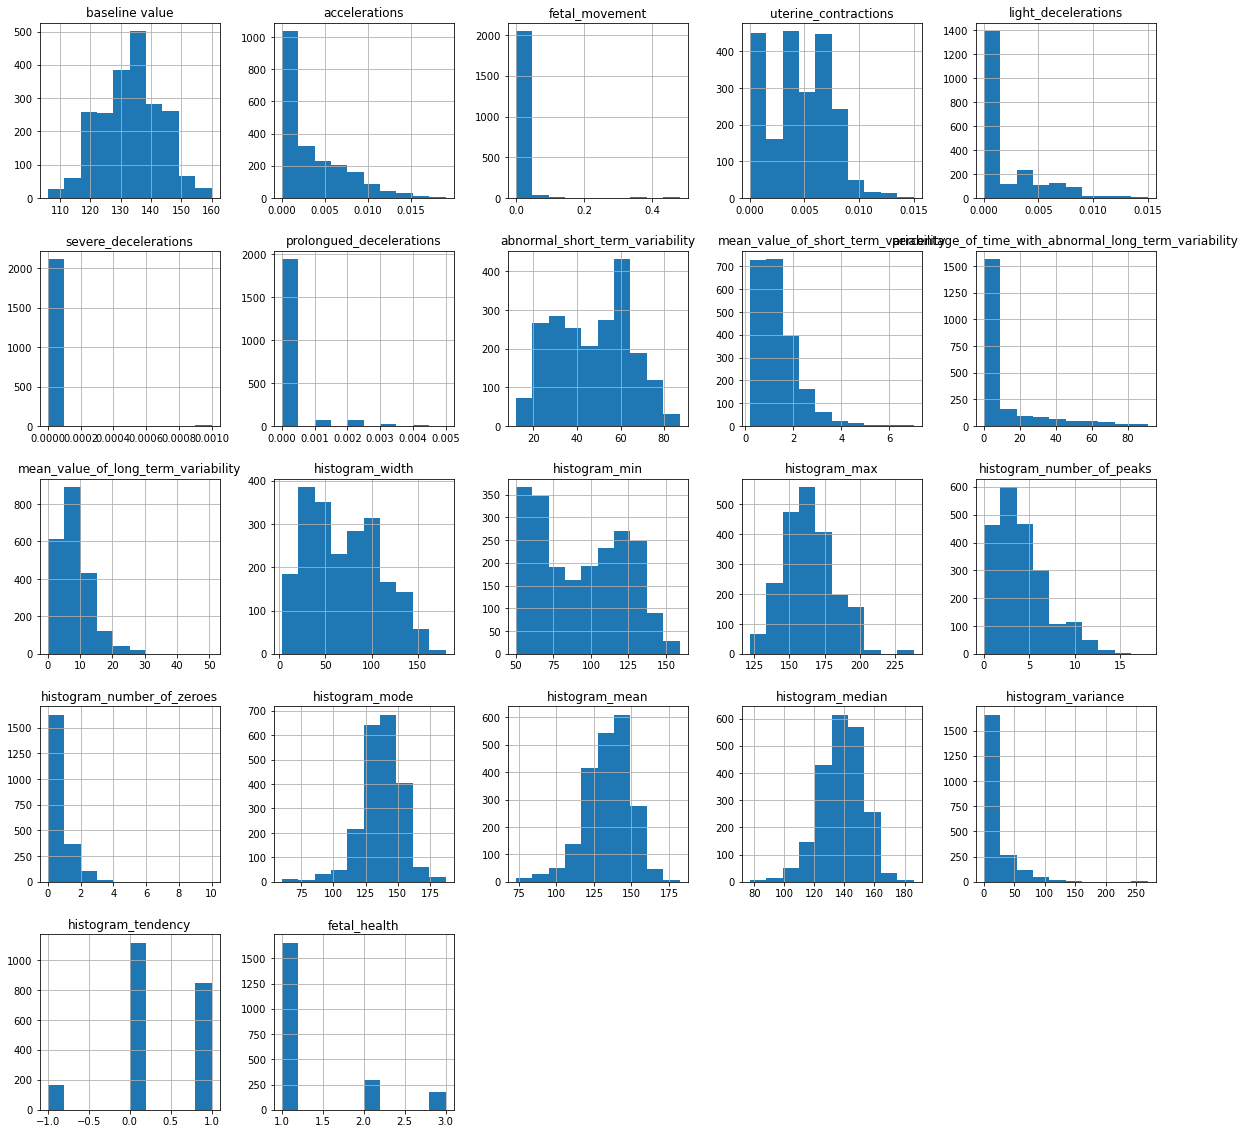

In [8]:
histPlot = df.hist(figsize = (20,20))

Function diatas digunakan untuk mengetahui distribusi dari setiap kolom di dataset. Beberapa variabel terlihat terdistribusi normal seperti baseline value dan histogram_mode.

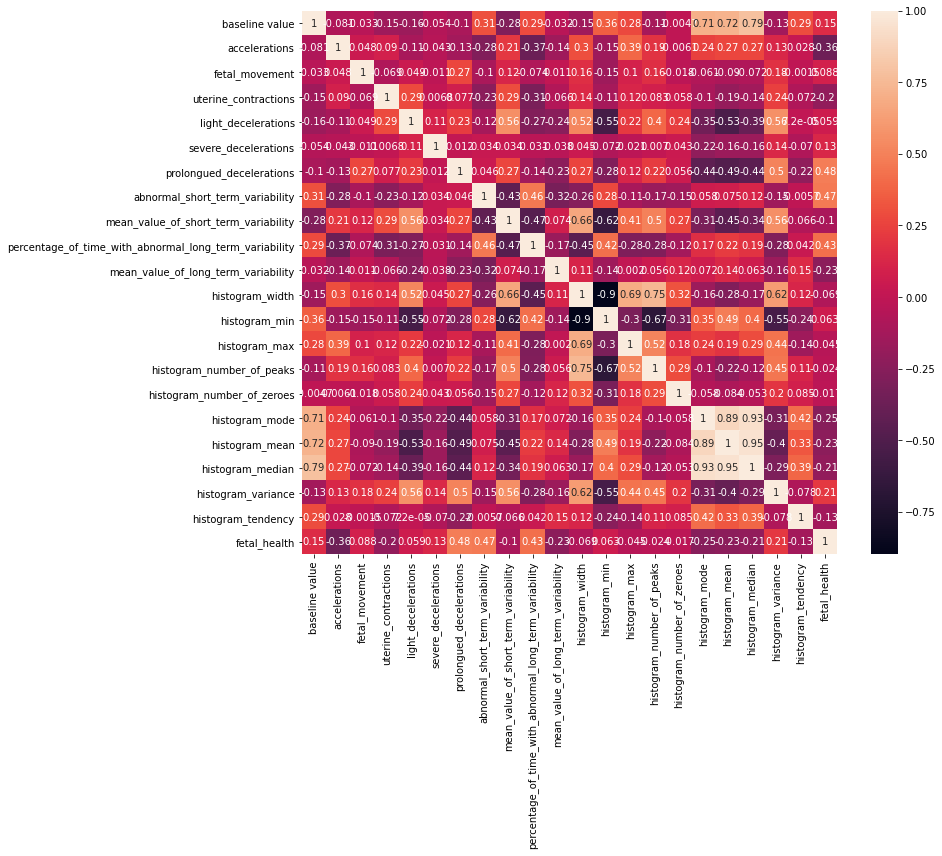

In [9]:
plt.figure(figsize=(12,10))
p = sns.heatmap(df.corr(), annot=True)

Function diatas digunakan untuk melihat korelasi setiap variabel yang ada. Dikarenakan fetal_health merupakan dependent variable, variabel yang lain akan dibandingkan nilai korelasinya dengan fetal_health. Tidak semua variabel akan digunakan dalam modelling, dikarenakan nilai korelasinya dengan dependent variable rendah atau nilai korelasinya tinggi dengan independent variable lainnya.

# Feature Engineering

In [10]:
sc_X = StandardScaler()
X_df =  pd.DataFrame(sc_X.fit_transform(df.drop(['fetal_health', 'fetal_movement', 'light_decelerations',
                                             'mean_value_of_short_term_variability', 'histogram_width',
                                            'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
                                            'histogram_number_of_zeroes', 'histogram_mean',
                                           'histogram_median', 'histogram_tendency'],axis = 1),),
                  columns=['baseline value', 'accelerations',
       'uterine_contractions', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_mode', 'histogram_variance'])
X_df.head()

,baseline value,accelerations,uterine_contractions,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_mode,histogram_variance
0,-1.352220,-0.822388,-1.482465,-0.057476,-0.268754,1.513190,1.802542,-1.028560,-1.065614,1.870569
1,-0.132526,0.730133,0.554627,-0.057476,-0.268754,-1.744751,-0.535361,0.393176,0.216638,-0.234998
2,-0.030884,-0.046128,1.233657,-0.057476,-0.268754,-1.802928,-0.535361,0.926327,0.216638,-0.200481
3,0.070757,-0.046128,1.233657,-0.057476,-0.268754,-1.802928,-0.535361,2.632411,-0.027600,-0.200481
4,-0.132526,0.988886,1.233657,-0.057476,-0.268754,-1.802928,-0.535361,2.081488,-0.027600,-0.269516


Function diatas digunakan untuk menyamakan nilai dari variabel-variabel yang digunakan. Hal ini dilakukan karena nilai dari beberapa variabel sangat berbeda jauh (ada yang ratusan dan ada yang decimal). Ini digunakan supaya perhitungan dalam model tidak bias pada satu atribut saja.

In [11]:
y_df = df.fetal_health
y_df

0       2.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2121    2.0
2122    2.0
2123    2.0
2124    2.0
2125    1.0
Name: fetal_health, Length: 2126, dtype: float64

Function diatas digunakan untuk memasukkan dependent variable ke dalam variabel.

<AxesSubplot:>

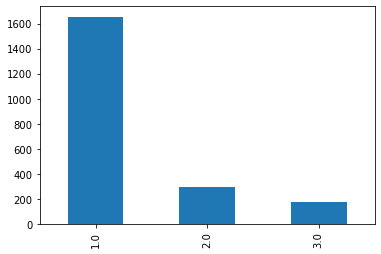

In [12]:
y_df.value_counts().plot(kind="bar")

Function diatas digunakan untuk melihat distribusi dari dependent variable. Dapat dilihat bahwa terdapat ketidakseimbangan dikarenakan value 1 jumlahnya jauh lebih banyak dibanding nilai lainnya.

In [13]:
sm = SMOTE(random_state = 42)
X, y = sm.fit_resample(X_df, y_df)

Function diatas digunakan untuk melakukan resample terhadap dependent variable.

In [14]:
unique, count = np.unique(y, return_counts = True)
y_smote_count = {k:v for (k,v) in zip(unique, count)}
y_smote_count

{1.0: 1655, 2.0: 1655, 3.0: 1655}

Function diatas digunakan untuk menghitung jumlah observasi tiap value di dependent variable.

<AxesSubplot:>

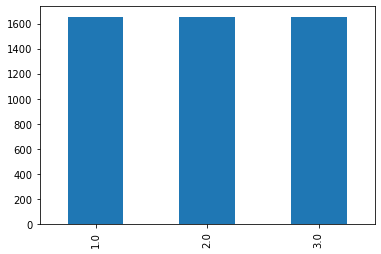

In [15]:
y.value_counts().plot(kind="bar")

Function diatas digunakan untuk melihat distribusi tiap value di dependent variable. Semua value memiliki jumlah yang sama yaitu 1655.

# Modelling

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

Function diatas digunakan untuk membagi dataset ke training dan testing set. Diatur ukuran test set sebesar 30%.

              precision    recall  f1-score   support

         1.0       0.97      0.87      0.92       520
         2.0       0.86      0.92      0.89       485
         3.0       0.94      0.98      0.96       485

    accuracy                           0.92      1490
   macro avg       0.92      0.92      0.92      1490
weighted avg       0.92      0.92      0.92      1490



Text(33.0, 0.5, 'Predicted Value')

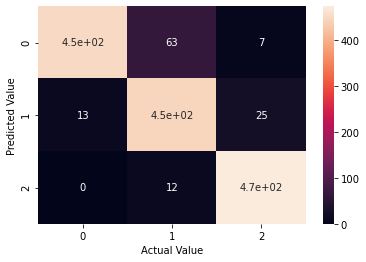

In [17]:
svc_model = SVC()
svc_model.fit(X_train, y_train)
svcPred = svc_model.predict(X_test)

print(classification_report(y_test, svcPred))
sns.heatmap(confusion_matrix(y_test, svcPred), annot = True)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

Function diatas digunakan untuk modelling dan menampilkan classification report serta confusion matrix menggunakan metode Support Vector Classification. Didapat nilai 0.92 untuk precision, recall dan f1-score untuk model ini.

              precision    recall  f1-score   support

         1.0       0.94      0.95      0.94       520
         2.0       0.94      0.92      0.93       485
         3.0       0.98      0.99      0.99       485

    accuracy                           0.95      1490
   macro avg       0.95      0.95      0.95      1490
weighted avg       0.95      0.95      0.95      1490



Text(33.0, 0.5, 'Predicted Value')

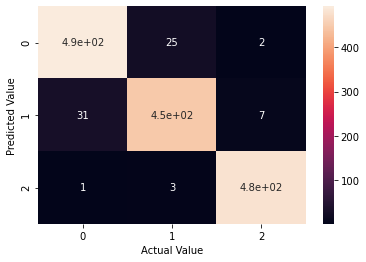

In [18]:
dt = DecisionTreeClassifier()
dtModel = dt.fit(X_train, y_train)
dtPred = dt.predict(X_test)
print(classification_report(y_test, dtPred))
sns.heatmap(confusion_matrix(y_test, dtPred), annot = True)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

Function diatas digunakan untuk modelling dan menampilkan classification report serta confusion matrix menggunakan metode Decision Tree Classifier. Didapat nilai 0.95 untuk precision, recall dan f1-score untuk model ini.

              precision    recall  f1-score   support

         1.0       0.84      0.93      0.88       468
         2.0       0.85      0.74      0.79       560
         3.0       0.83      0.87      0.85       462

    accuracy                           0.84      1490
   macro avg       0.84      0.85      0.84      1490
weighted avg       0.84      0.84      0.84      1490



Text(33.0, 0.5, 'Predicted Value')

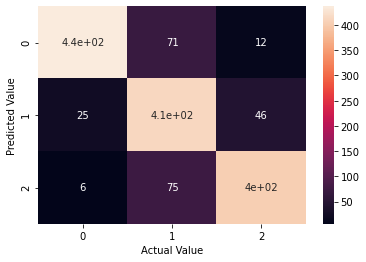

In [19]:
lr = LogisticRegression(multi_class = 'ovr')
lrModel = lr.fit(X_train, y_train)
lrPred = lr.predict(X_test)
print(classification_report(lrPred, y_test))
sns.heatmap(confusion_matrix(y_test, lrPred), annot = True)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

Function diatas digunakan untuk modelling dan menampilkan classification report serta confusion matrix menggunakan metode Linear Regression. Didapat nilai 0.85 untuk precision, recall dan f1-score untuk model ini.

              precision    recall  f1-score   support

         1.0       0.98      0.95      0.96       520
         2.0       0.95      0.96      0.96       485
         3.0       0.98      1.00      0.99       485

    accuracy                           0.97      1490
   macro avg       0.97      0.97      0.97      1490
weighted avg       0.97      0.97      0.97      1490



Text(33.0, 0.5, 'Predicted Value')

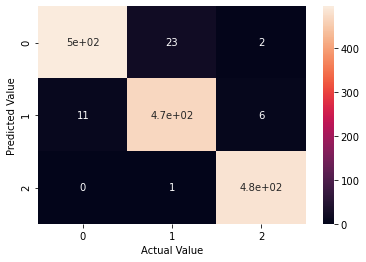

In [20]:
randomForest = RandomForestClassifier()
rfModel = randomForest.fit(X_train, y_train)
rfPred = randomForest.predict(X_test)
print(classification_report(y_test, rfPred))
sns.heatmap(confusion_matrix(y_test, rfPred), annot = True)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

Function diatas digunakan untuk modelling dan menampilkan classification report serta confusion matrix menggunakan metode Random Forest. Didapat nilai 0.97 untuk precision, recall dan f1-score untuk model ini.

              precision    recall  f1-score   support

         1.0       0.99      0.90      0.94       520
         2.0       0.91      0.97      0.94       485
         3.0       0.98      1.00      0.99       485

    accuracy                           0.96      1490
   macro avg       0.96      0.96      0.96      1490
weighted avg       0.96      0.96      0.95      1490



Text(33.0, 0.5, 'Predicted Value')

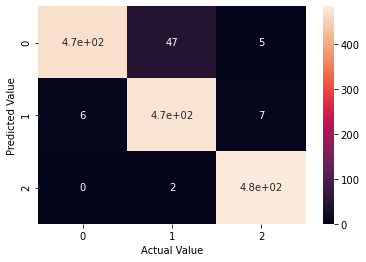

In [21]:
knn = KNeighborsClassifier()
knnModel = knn.fit(X_train, y_train)
knnPred = knn.predict(X_test)
print(classification_report(y_test, knnPred))
sns.heatmap(confusion_matrix(y_test, knnPred), annot = True)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

Function diatas digunakan untuk modelling dan menampilkan classification report serta confusion matrix menggunakan metode KNearest Neighbors. Didapat nilai 0.96 untuk precision, recall dan f1-score untuk model ini.

              precision    recall  f1-score   support

         1.0       0.99      0.92      0.96       520
         2.0       0.92      0.98      0.95       485
         3.0       0.98      0.99      0.99       485

    accuracy                           0.96      1490
   macro avg       0.97      0.97      0.96      1490
weighted avg       0.97      0.96      0.96      1490



Text(33.0, 0.5, 'Predicted Value')

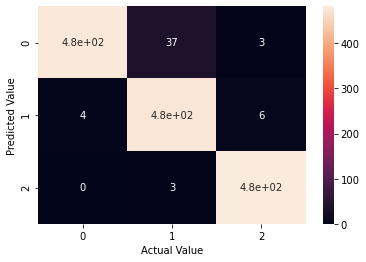

In [22]:
estimators = [('svm', svc_model), ('KNN', knn), ('DecisionTree', dt)]
ensemble = VotingClassifier(estimators, voting = 'hard')

ensembleModel = ensemble.fit(X_train, y_train)
ensemblePred = ensemble.predict(X_test)
print(classification_report(y_test, ensemblePred))
sns.heatmap(confusion_matrix(y_test, ensemblePred), annot = True)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

Function diatas digunakan untuk modelling dan menampilkan classification report serta confusion matrix menggunakan metode Ensemble menggunakan SVM, KNearest Neighbor dan Decision Tree. Didapat nilai 0.97 untuk precision, recall dan f1-score untuk model ini.

# Modelling Using GridSearchCV

In [23]:
svc_param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
cv_svc = GridSearchCV(svc_model, cv = 10,
                    param_grid = svc_param_grid,
                    n_jobs = 3)
cv_svc_model = cv_svc.fit(X_train, y_train)
print('Best Parameters using grid search: \n', cv_svc_model.best_params_)

Best Parameters using grid search: 
 {'C': 10, 'gamma': 1, 'kernel': 'rbf'}


Function diatas digunakan untuk mengatur parameter-parameter yang akan dipakai untuk melakukan GridSearchCV untuk model SVC. Parameter terbaik adalah C: 10, gamma: 1 dan kernel: rbf.

              precision    recall  f1-score   support

         1.0       1.00      0.96      0.98       520
         2.0       0.95      0.99      0.97       485
         3.0       0.99      1.00      0.99       485

    accuracy                           0.98      1490
   macro avg       0.98      0.98      0.98      1490
weighted avg       0.98      0.98      0.98      1490



Text(33.0, 0.5, 'Predicted Value')

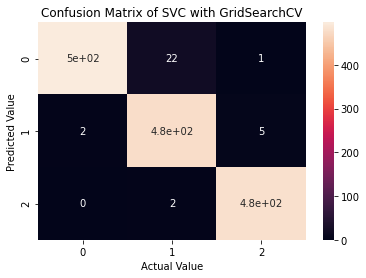

In [24]:
cv_svcPred = cv_svc_model.predict(X_test)
print(classification_report(y_test, cv_svcPred))
sns.heatmap(confusion_matrix(y_test, cv_svcPred), annot = True)
plt.title('Confusion Matrix of SVC with GridSearchCV')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

Function diatas digunakan untuk modelling dan menampilkan classification report serta confusion matrix menggunakan metode KNearest Neighbors yang sudah diberlakukan GridSearchCV. Didapat nilai 0.98 untuk precision, recall dan f1-score untuk model ini.

In [25]:
dt_param_grid = {'criterion' : ['gini', 'entropy'], 'max_depth' : [2,4,6,8,10,12]}
cv_dt = GridSearchCV(dt, cv = 10,
                    param_grid = dt_param_grid,
                    n_jobs = 3)
cv_dtModel = cv_dt.fit(X_train, y_train)
print('Best Parameters using grid search: \n', cv_dtModel.best_params_)

Best Parameters using grid search: 
 {'criterion': 'entropy', 'max_depth': 12}


Function diatas digunakan untuk mengatur parameter-parameter yang akan dipakai untuk melakukan GridSearchCV untuk model Decision Tree. Parameter terbaik adalah criterion: entropy dan max_depth: 12.

              precision    recall  f1-score   support

         1.0       0.96      0.93      0.94       520
         2.0       0.92      0.93      0.93       485
         3.0       0.97      0.98      0.98       485

    accuracy                           0.95      1490
   macro avg       0.95      0.95      0.95      1490
weighted avg       0.95      0.95      0.95      1490



Text(33.0, 0.5, 'Predicted Value')

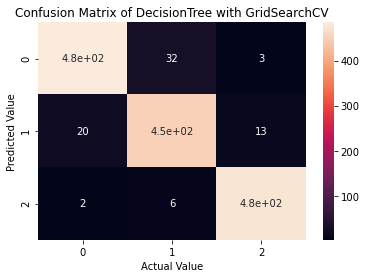

In [26]:
cv_dtPred = cv_dtModel.predict(X_test)
print(classification_report(y_test, cv_dtPred))
sns.heatmap(confusion_matrix(y_test, cv_dtPred), annot = True)
plt.title('Confusion Matrix of DecisionTree with GridSearchCV')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

Function diatas digunakan untuk modelling dan menampilkan classification report serta confusion matrix menggunakan metode Decision Tree yang sudah diberlakukan GridSearchCV. Didapat nilai 0.95 untuk precision, recall dan f1-score untuk model ini.

In [27]:
lr_param_grid = {'penalty' : ['l1', 'l2', 'elasticnet', None], 'C' : [0.1,1, 10, 100],
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear']}
cv_lr = GridSearchCV(lr, cv = 10,
                    param_grid = lr_param_grid,
                    n_jobs = 3)
cv_lrModel = cv_lr.fit(X_train, y_train)
print('Best Parameters using grid search: \n', cv_lrModel.best_params_)

Best Parameters using grid search: 
 {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


Function diatas digunakan untuk mengatur parameter-parameter yang akan dipakai untuk melakukan GridSearchCV untuk model Linear Regression. Parameter terbaik adalah C: 10, penalty: 11 dan solver: liblinear.

              precision    recall  f1-score   support

         1.0       0.94      0.85      0.89       520
         2.0       0.75      0.86      0.80       485
         3.0       0.88      0.84      0.86       485

    accuracy                           0.85      1490
   macro avg       0.85      0.85      0.85      1490
weighted avg       0.86      0.85      0.85      1490



Text(33.0, 0.5, 'Predicted Value')

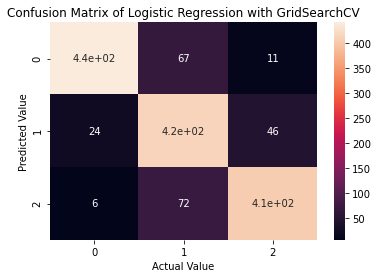

In [28]:
cv_lrPred = cv_lrModel.predict(X_test)
print(classification_report(y_test, cv_lrPred))
sns.heatmap(confusion_matrix(y_test, cv_lrPred), annot = True)
plt.title('Confusion Matrix of Logistic Regression with GridSearchCV')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

Function diatas digunakan untuk modelling dan menampilkan classification report serta confusion matrix menggunakan metode Linear Regression yang sudah diberlakukan GridSearchCV. Didapat nilai 0.85 untuk precision, recall dan f1-score untuk model ini.

In [29]:
rf_param_dist = {'max_depth' : [2, 3, 4, 5, 6, 7, 8],
              'bootstrap' : [True, False],
              'max_features' : ['auto', 'sqrt', 'log2', None],
              'criterion' : ['gini', 'entropy']}
cv_rf = GridSearchCV(randomForest, cv = 10,
                    param_grid = rf_param_dist,
                    n_jobs = 3)

cv_rfModel = cv_rf.fit(X_train, y_train)
print('Best Parameters using grid search: \n', cv_rfModel.best_params_)

Best Parameters using grid search: 
 {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt'}


Function diatas digunakan untuk mengatur parameter-parameter yang akan dipakai untuk melakukan GridSearchCV untuk model Random Forest. Parameter terbaik adalah bootstrap: True, criterion: entropy, max_depth: 8 dan max_features: None.

              precision    recall  f1-score   support

         1.0       0.99      0.92      0.95       520
         2.0       0.90      0.98      0.94       485
         3.0       0.99      0.97      0.98       485

    accuracy                           0.96      1490
   macro avg       0.96      0.96      0.96      1490
weighted avg       0.96      0.96      0.96      1490



Text(33.0, 0.5, 'Predicted Value')

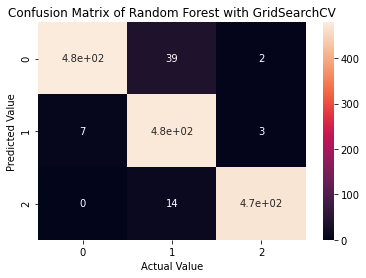

In [30]:
cv_rfPred = cv_rfModel.predict(X_test)
print(classification_report(y_test, cv_rfPred))
sns.heatmap(confusion_matrix(y_test, cv_rfPred), annot = True)
plt.title('Confusion Matrix of Random Forest with GridSearchCV')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

Function diatas digunakan untuk modelling dan menampilkan classification report serta confusion matrix menggunakan metode Random Forest yang sudah diberlakukan GridSearchCV. Didapat nilai 0.96 untuk precision, recall dan f1-score untuk model ini.

In [31]:
knn_param_dist = {'n_neighbors' : [2, 3, 4, 5, 6, 7, 8],
              'weights' : ['uniform', 'distance', None],
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}
cv_knn = GridSearchCV(knn, cv = 10,
                    param_grid = knn_param_dist,
                    n_jobs = 3)

cv_knnModel = cv_knn.fit(X_train, y_train)
print('Best Parameters using grid search: \n', cv_knnModel.best_params_)

Best Parameters using grid search: 
 {'algorithm': 'auto', 'n_neighbors': 2, 'weights': 'distance'}


Function diatas digunakan untuk mengatur parameter-parameter yang akan dipakai untuk melakukan GridSearchCV untuk model KNearest Neighbors. Parameter terbaik adalah algorithm: auto, n_neighbors: 2 dan weights: distance.

              precision    recall  f1-score   support

         1.0       0.99      0.93      0.96       520
         2.0       0.93      0.98      0.96       485
         3.0       0.98      1.00      0.99       485

    accuracy                           0.97      1490
   macro avg       0.97      0.97      0.97      1490
weighted avg       0.97      0.97      0.97      1490



Text(33.0, 0.5, 'Predicted Value')

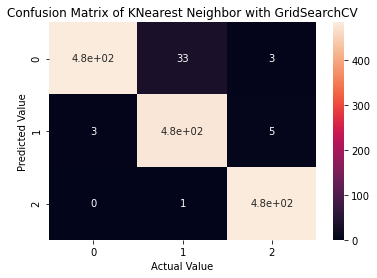

In [32]:
cv_knnPred = cv_knnModel.predict(X_test)
print(classification_report(y_test, cv_knnPred))
sns.heatmap(confusion_matrix(y_test, cv_knnPred), annot = True)
plt.title('Confusion Matrix of KNearest Neighbor with GridSearchCV')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

Function diatas digunakan untuk modelling dan menampilkan classification report serta confusion matrix menggunakan metode KNearest Neighbors yang sudah diberlakukan GridSearchCV. Didapat nilai 0.97 untuk precision, recall dan f1-score untuk model ini.

Dapat disimpulkan dari kasus ini, bahwa GridSearchCV secara umum meningkatkan performa dari model yang tidak menggunakan GridSearchCV. Jika performa tidak meningkat, setidaknya performanya tidak berkurang (terkecuali random forest).